<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (Non

ValueError: ignored

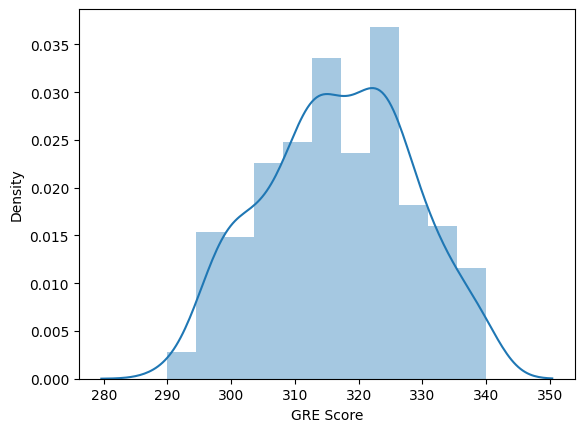

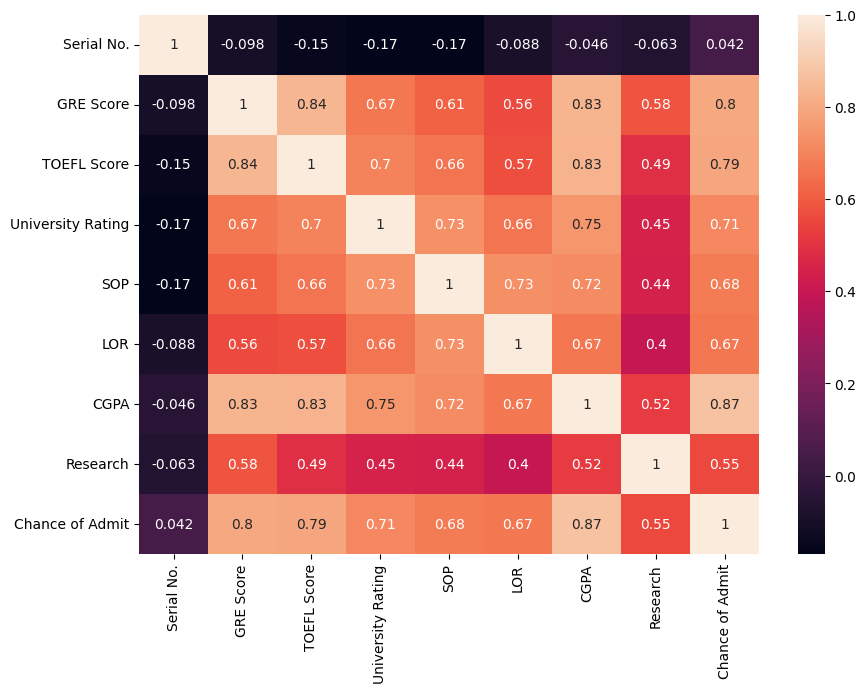

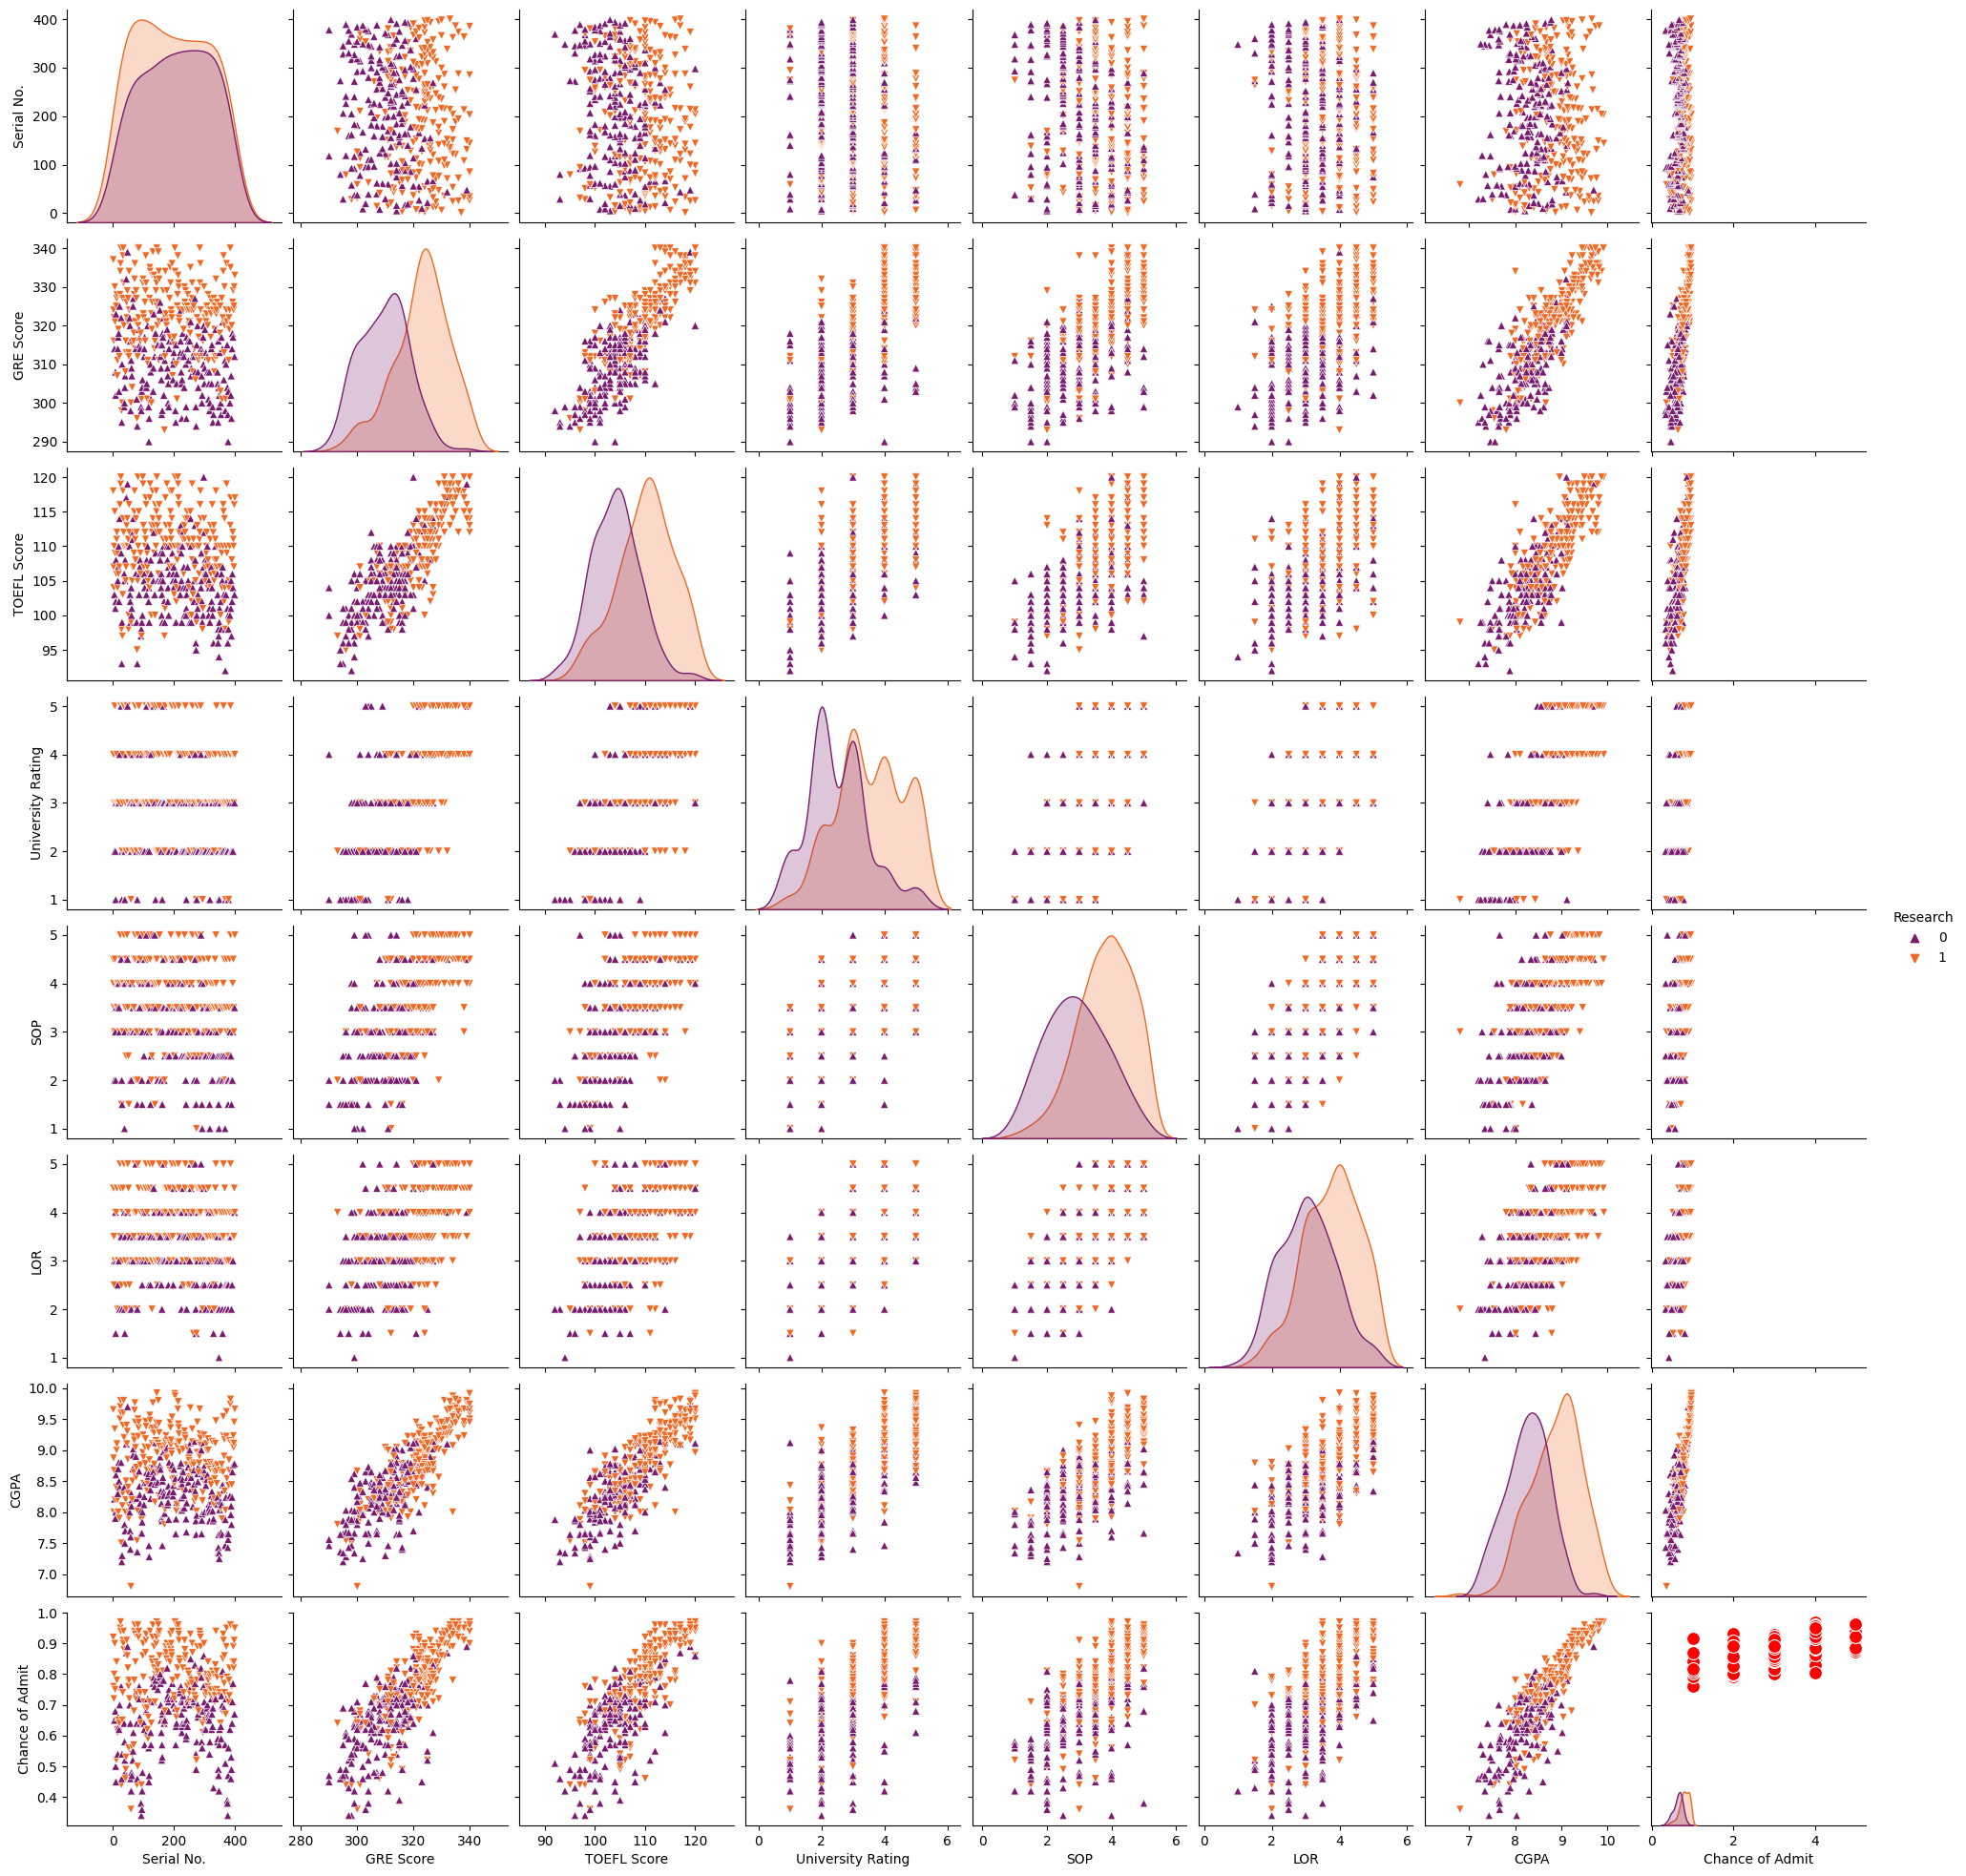

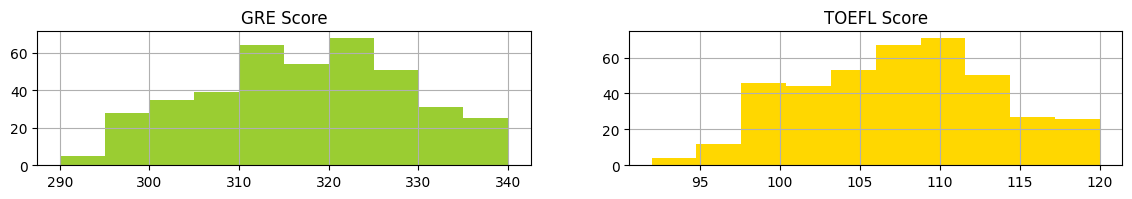

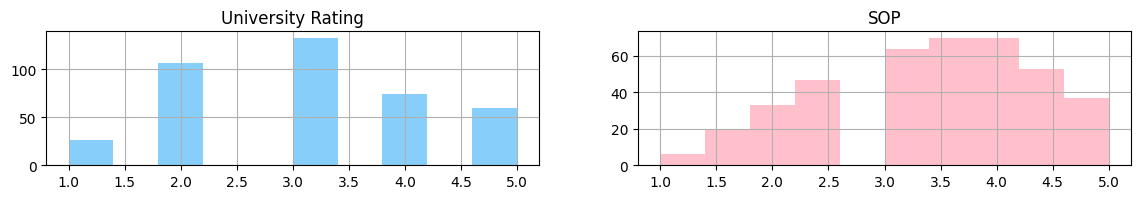

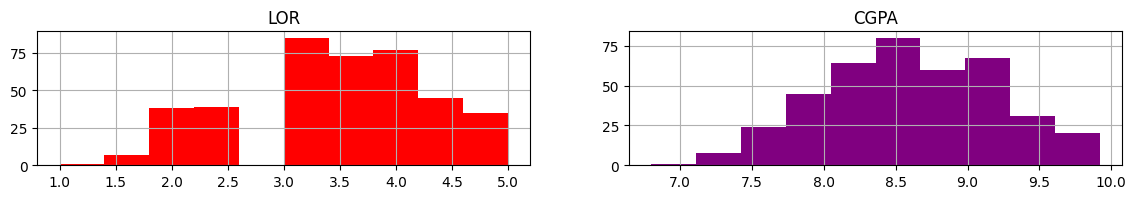

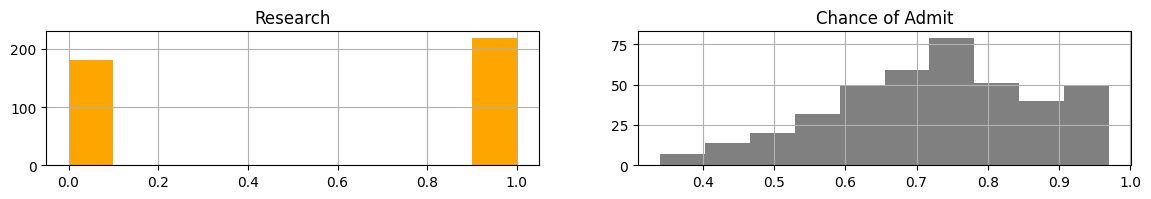

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('/content/drive/MyDrive/Project.csv')
data.info()
data.isnull().any()
data.head()
data.describe()
sns.distplot(data['GRE Score'])
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
sns.pairplot(data=data,hue='Research',markers=["^","v"],palette='inferno')
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='r',s=100)
category=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']
color=['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start=True
for i in np.arange(4):
  fig=plt.figure(figsize=(14,8))
  plt.subplot2grid((4,2),(i,0))
  data[category[2*i]].hist(color=color[2*i],bins=10)
  plt.title(category[2*i])
  plt.subplot2grid((4,2),(i,1))
  data[category[2*i+1]].hist(color=color[2*i+1],bins=10)
  plt.title(category[2*i+1])
  from sklearn.preprocessing import MinMaxScaler
x=data.iloc[:,:7].values
y=data.iloc[:,7].values
sc=MinMaxScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)
y_train=(y_train>0.5)
y_train
y_test=(y_test>0.5)
y_test
from sklearn.linear_model import LogisticRegression
cls=LogisticRegression()
Ir=cls.fit(x_train,y_train)
y_pred=Ir.predict(x_test)
y_pred
#libraries to train Neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
#Initialize the model
model=keras.Sequential()
#Add input layer
model.add(Dense(7,activation='relu',input_dim=7))
#Add hidden layers
model.add(Dense(7,activation='relu'))
#Add output layer
model.add(Dense(1,activation='linear'))
model.summary()
model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=20,epochs=30)
from sklearn.metrics import accuracy_score
#Make predications on the training data
train_predications=model.predict(x_train)
print(train_predications)
#get the training accuracy
train_acc=model.evaluate(x_train,y_train,verbose=0)[1]
print(train_acc)
#get the test accuracy
test_acc=model.evaluate(x_test,y_test,verbose=0)[1]
print(test_acc)
pred=model.predict(x_test)
pred=(pred>0.5)
pred
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("Accuracy score:%f"% (accuracy_score(y_test,y_pred)*100))
print("Recall score:%f"% (recall_score(y_test,y_pred)*100))
print("ROC score %f\n"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix,classification_report
print(classification_report(y_train,pred))
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix,classification_report
print(classification_report(y_test,pred))
